In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[ 코로나 이전 ]

In [124]:
# 데이터 불러오기
df1 = pd.read_csv("./코로나 이전 승하차인원.csv")
df2 = pd.read_csv("./코로나 시기 승하차인원.csv")
df3 = pd.read_csv("./코로나 이후 승하차인원.csv")

In [125]:
df1.head()

,날짜,역명,구분,06시 이전,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,...,월,일,요일,분기,역전화번호,도로명주소,지번주소,행정동,위도,경도
0,2018-01-01,1호선 서울역,승차,373,318,365,785,1047,1576,2510,...,1,1,월,1,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선),남대문로5가,37.553150,126.972533
1,2018-01-01,1호선 서울역,하차,205,1040,872,984,1650,1743,2175,...,1,1,월,1,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선),남대문로5가,37.553150,126.972533
2,2018-01-01,1호선 시청역,승차,87,105,124,197,291,499,722,...,1,1,월,1,02-6110-1321,서울특별시 중구 세종대로 지하101(정동),서울특별시 중구 정동 5-5 시청역(1호선),정동,37.563590,126.975407
3,2018-01-01,1호선 시청역,하차,47,294,497,1017,673,657,820,...,1,1,월,1,02-6110-1321,서울특별시 중구 세종대로 지하101(정동),서울특별시 중구 정동 5-5 시청역(1호선),정동,37.563590,126.975407
4,2018-01-01,1호선 종각역,승차,604,399,191,250,370,439,705,...,1,1,월,1,02-6110-1311,서울특별시 종로구 종로 지하55(종로1가),서울특별시 종로구 종로1가 54 종각역(1호선),종로1가,37.570203,126.983116


In [126]:
# '07시-08시', '08시-09시', '09-10시 합쳐서 '출근시간대' 컬럼 생성
df1['출근시간대'] = df1['07시-08시'] + df1['08시-09시'] + df1['09시-10시']
df1.head()

,날짜,역명,구분,06시 이전,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,...,일,요일,분기,역전화번호,도로명주소,지번주소,행정동,위도,경도,출근시간대
0,2018-01-01,1호선 서울역,승차,373,318,365,785,1047,1576,2510,...,1,월,1,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선),남대문로5가,37.553150,126.972533,2197
1,2018-01-01,1호선 서울역,하차,205,1040,872,984,1650,1743,2175,...,1,월,1,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선),남대문로5가,37.553150,126.972533,3506
2,2018-01-01,1호선 시청역,승차,87,105,124,197,291,499,722,...,1,월,1,02-6110-1321,서울특별시 중구 세종대로 지하101(정동),서울특별시 중구 정동 5-5 시청역(1호선),정동,37.563590,126.975407,612
3,2018-01-01,1호선 시청역,하차,47,294,497,1017,673,657,820,...,1,월,1,02-6110-1321,서울특별시 중구 세종대로 지하101(정동),서울특별시 중구 정동 5-5 시청역(1호선),정동,37.563590,126.975407,2187
4,2018-01-01,1호선 종각역,승차,604,399,191,250,370,439,705,...,1,월,1,02-6110-1311,서울특별시 종로구 종로 지하55(종로1가),서울특별시 종로구 종로1가 54 종각역(1호선),종로1가,37.570203,126.983116,811


In [127]:
# '11시-12시', '12시-13시', '13시-14시', '14시-15시', '15시-16시' 합쳐서 '낮 시간대' 컬럼 생성
df1['낮 시간대'] = df1['11시-12시'] + df1['12시-13시'] + df1['13시-14시'] + df1['14시-15시'] + df1['15시-16시']
df1.head()

,날짜,역명,구분,06시 이전,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,...,요일,분기,역전화번호,도로명주소,지번주소,행정동,위도,경도,출근시간대,낮 시간대
0,2018-01-01,1호선 서울역,승차,373,318,365,785,1047,1576,2510,...,월,1,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선),남대문로5가,37.553150,126.972533,2197,14311
1,2018-01-01,1호선 서울역,하차,205,1040,872,984,1650,1743,2175,...,월,1,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선),남대문로5가,37.553150,126.972533,3506,13473
2,2018-01-01,1호선 시청역,승차,87,105,124,197,291,499,722,...,월,1,02-6110-1321,서울특별시 중구 세종대로 지하101(정동),서울특별시 중구 정동 5-5 시청역(1호선),정동,37.563590,126.975407,612,3642
3,2018-01-01,1호선 시청역,하차,47,294,497,1017,673,657,820,...,월,1,02-6110-1321,서울특별시 중구 세종대로 지하101(정동),서울특별시 중구 정동 5-5 시청역(1호선),정동,37.563590,126.975407,2187,4494
4,2018-01-01,1호선 종각역,승차,604,399,191,250,370,439,705,...,월,1,02-6110-1311,서울특별시 종로구 종로 지하55(종로1가),서울특별시 종로구 종로1가 54 종각역(1호선),종로1가,37.570203,126.983116,811,5940


In [128]:
# '17시-18시', '18시-19시', '19시-20시' 합쳐서 '퇴근시간대' 컬럼 생성
df1['퇴근시간대'] = df1['17시-18시'] + df1['18시-19시'] + df1['19시-20시']
df1.head()

,날짜,역명,구분,06시 이전,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,...,분기,역전화번호,도로명주소,지번주소,행정동,위도,경도,출근시간대,낮 시간대,퇴근시간대
0,2018-01-01,1호선 서울역,승차,373,318,365,785,1047,1576,2510,...,1,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선),남대문로5가,37.553150,126.972533,2197,14311,10063
1,2018-01-01,1호선 서울역,하차,205,1040,872,984,1650,1743,2175,...,1,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선),남대문로5가,37.553150,126.972533,3506,13473,7313
2,2018-01-01,1호선 시청역,승차,87,105,124,197,291,499,722,...,1,02-6110-1321,서울특별시 중구 세종대로 지하101(정동),서울특별시 중구 정동 5-5 시청역(1호선),정동,37.563590,126.975407,612,3642,3543
3,2018-01-01,1호선 시청역,하차,47,294,497,1017,673,657,820,...,1,02-6110-1321,서울특별시 중구 세종대로 지하101(정동),서울특별시 중구 정동 5-5 시청역(1호선),정동,37.563590,126.975407,2187,4494,1642
4,2018-01-01,1호선 종각역,승차,604,399,191,250,370,439,705,...,1,02-6110-1311,서울특별시 종로구 종로 지하55(종로1가),서울특별시 종로구 종로1가 54 종각역(1호선),종로1가,37.570203,126.983116,811,5940,6216


In [129]:
# '22시-23시', '23시-24시', '24시 이후' 합쳐서 '야간시간대' 컬럼 생성
df1['야간시간대'] = df1['22시-23시'] + df1['23시-24시'] + df1['24시 이후']
df1.head()

,날짜,역명,구분,06시 이전,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,...,역전화번호,도로명주소,지번주소,행정동,위도,경도,출근시간대,낮 시간대,퇴근시간대,야간시간대
0,2018-01-01,1호선 서울역,승차,373,318,365,785,1047,1576,2510,...,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선),남대문로5가,37.553150,126.972533,2197,14311,10063,2627
1,2018-01-01,1호선 서울역,하차,205,1040,872,984,1650,1743,2175,...,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선),남대문로5가,37.553150,126.972533,3506,13473,7313,1492
2,2018-01-01,1호선 시청역,승차,87,105,124,197,291,499,722,...,02-6110-1321,서울특별시 중구 세종대로 지하101(정동),서울특별시 중구 정동 5-5 시청역(1호선),정동,37.563590,126.975407,612,3642,3543,776
3,2018-01-01,1호선 시청역,하차,47,294,497,1017,673,657,820,...,02-6110-1321,서울특별시 중구 세종대로 지하101(정동),서울특별시 중구 정동 5-5 시청역(1호선),정동,37.563590,126.975407,2187,4494,1642,299
4,2018-01-01,1호선 종각역,승차,604,399,191,250,370,439,705,...,02-6110-1311,서울특별시 종로구 종로 지하55(종로1가),서울특별시 종로구 종로1가 54 종각역(1호선),종로1가,37.570203,126.983116,811,5940,6216,2066


In [130]:
# index를 포함하지 않고 데이터 저장
df1.to_csv("코로나 이전 시간대별 승하차인원.csv", index=False)
df1.head()

,날짜,역명,구분,06시 이전,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,...,역전화번호,도로명주소,지번주소,행정동,위도,경도,출근시간대,낮 시간대,퇴근시간대,야간시간대
0,2018-01-01,1호선 서울역,승차,373,318,365,785,1047,1576,2510,...,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선),남대문로5가,37.553150,126.972533,2197,14311,10063,2627
1,2018-01-01,1호선 서울역,하차,205,1040,872,984,1650,1743,2175,...,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선),남대문로5가,37.553150,126.972533,3506,13473,7313,1492
2,2018-01-01,1호선 시청역,승차,87,105,124,197,291,499,722,...,02-6110-1321,서울특별시 중구 세종대로 지하101(정동),서울특별시 중구 정동 5-5 시청역(1호선),정동,37.563590,126.975407,612,3642,3543,776
3,2018-01-01,1호선 시청역,하차,47,294,497,1017,673,657,820,...,02-6110-1321,서울특별시 중구 세종대로 지하101(정동),서울특별시 중구 정동 5-5 시청역(1호선),정동,37.563590,126.975407,2187,4494,1642,299
4,2018-01-01,1호선 종각역,승차,604,399,191,250,370,439,705,...,02-6110-1311,서울특별시 종로구 종로 지하55(종로1가),서울특별시 종로구 종로1가 54 종각역(1호선),종로1가,37.570203,126.983116,811,5940,6216,2066


In [131]:
df1_1 = pd.read_csv("./코로나 이전 시간대별 승하차인원.csv")
df1_1.head()

,날짜,역명,구분,06시 이전,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,...,역전화번호,도로명주소,지번주소,행정동,위도,경도,출근시간대,낮 시간대,퇴근시간대,야간시간대
0,2018-01-01,1호선 서울역,승차,373,318,365,785,1047,1576,2510,...,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선),남대문로5가,37.553150,126.972533,2197,14311,10063,2627
1,2018-01-01,1호선 서울역,하차,205,1040,872,984,1650,1743,2175,...,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선),남대문로5가,37.553150,126.972533,3506,13473,7313,1492
2,2018-01-01,1호선 시청역,승차,87,105,124,197,291,499,722,...,02-6110-1321,서울특별시 중구 세종대로 지하101(정동),서울특별시 중구 정동 5-5 시청역(1호선),정동,37.563590,126.975407,612,3642,3543,776
3,2018-01-01,1호선 시청역,하차,47,294,497,1017,673,657,820,...,02-6110-1321,서울특별시 중구 세종대로 지하101(정동),서울특별시 중구 정동 5-5 시청역(1호선),정동,37.563590,126.975407,2187,4494,1642,299
4,2018-01-01,1호선 종각역,승차,604,399,191,250,370,439,705,...,02-6110-1311,서울특별시 종로구 종로 지하55(종로1가),서울특별시 종로구 종로1가 54 종각역(1호선),종로1가,37.570203,126.983116,811,5940,6216,2066


In [132]:
# '출근시간대' 컬럼 전체 총합
df1_1_sum = df1_1['출근시간대'].sum()
print(df1_1_sum)

1609379224


In [133]:
# '낮 시간대' 컬럼 전체 총합
df1_2_sum = df1_1['낮 시간대'].sum()
print(df1_2_sum)

1782642419


In [134]:
# '퇴근시간대' 컬럼 전체 총합
df1_3_sum = df1_1['퇴근시간대'].sum()
print(df1_3_sum)

1799408999


In [135]:
# '야간시간대' 컬럼 전체 총합
df1_4_sum = df1_1['야간시간대'].sum()
print(df1_4_sum)

506757529


In [136]:
numbers = [1609379224, 1782642419, 1799408999, 506757529]
total = sum(numbers)
ratios = [num / total * 100 for num in numbers]
print(ratios)

[28.243700904625673, 31.284372602373296, 31.578616658498554, 8.89330983450248]


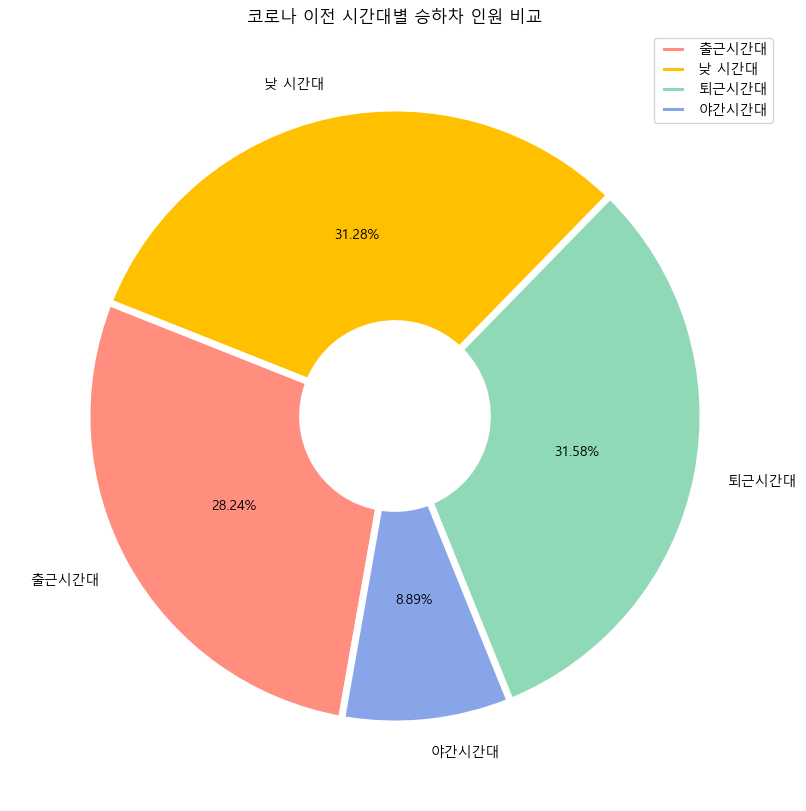

In [138]:
# 코로나 이전 시간대별 승하차 인원 전체 총합 파이차트

plt.rcParams["font.family"] = 'Malgun Gothic' # 한글폰트
plt.rcParams["figure.figsize"] = (10,10) # 그래픽 크기 설정

ratio = [28.24, 31.28, 31.58, 8.89]
labels = ['출근시간대', '낮 시간대', '퇴근시간대', '야간시간대']
colors = ['#ff8e7f','#ffc000', '#8fd9b6', '#89a5ea']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, startangle=260,counterclock=False, colors=colors,
        wedgeprops=wedgeprops, autopct='%1.2f%%')

plt.legend(labels)
plt.title('코로나 이전 시간대별 승하차 인원 비교')

[ 코로나 시기 ]

In [75]:
# '07시-08시', '08시-09시', '09-10시 합쳐서 '출근시간대' 컬럼 생성
df2['출근시간대'] = df2['07시-08시'] + df2['08시-09시'] + df2['09시-10시']
df2.head()

,날짜,역명,구분,06시 이전,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,...,일,요일,분기,역전화번호,도로명주소,지번주소,행정동,위도,경도,출근시간대
0,2020-04-01,1호선 서울역,승차,296,357,1149,1920,1144,941,1044,...,1,수,2,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선),남대문로5가,37.553150,126.972533,4213
1,2020-04-01,1호선 서울역,하차,193,1162,3081,7066,4142,1422,1130,...,1,수,2,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선),남대문로5가,37.553150,126.972533,14289
2,2020-04-01,1호선 시청역,승차,62,101,219,234,254,298,408,...,1,수,2,02-6110-1321,서울특별시 중구 세종대로 지하101(정동),서울특별시 중구 정동 5-5 시청역(1호선),정동,37.563590,126.975407,707
3,2020-04-01,1호선 시청역,하차,125,590,2423,6120,3025,1016,683,...,1,수,2,02-6110-1321,서울특별시 중구 세종대로 지하101(정동),서울특별시 중구 정동 5-5 시청역(1호선),정동,37.563590,126.975407,11568
4,2020-04-01,1호선 종각역,승차,87,79,187,271,307,386,622,...,1,수,2,02-6110-1311,서울특별시 종로구 종로 지하55(종로1가),서울특별시 종로구 종로1가 54 종각역(1호선),종로1가,37.570203,126.983116,765


In [76]:
# '11시-12시', '12시-13시', '13시-14시', '14시-15시', '15시-16시' 합쳐서 '낮 시간대' 컬럼 생성
df2['낮 시간대'] = df2['11시-12시'] + df2['12시-13시'] + df2['13시-14시'] + df2['14시-15시'] + df2['15시-16시']
df2.head()

,날짜,역명,구분,06시 이전,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,...,요일,분기,역전화번호,도로명주소,지번주소,행정동,위도,경도,출근시간대,낮 시간대
0,2020-04-01,1호선 서울역,승차,296,357,1149,1920,1144,941,1044,...,수,2,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선),남대문로5가,37.553150,126.972533,4213,6329
1,2020-04-01,1호선 서울역,하차,193,1162,3081,7066,4142,1422,1130,...,수,2,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선),남대문로5가,37.553150,126.972533,14289,5762
2,2020-04-01,1호선 시청역,승차,62,101,219,234,254,298,408,...,수,2,02-6110-1321,서울특별시 중구 세종대로 지하101(정동),서울특별시 중구 정동 5-5 시청역(1호선),정동,37.563590,126.975407,707,2875
3,2020-04-01,1호선 시청역,하차,125,590,2423,6120,3025,1016,683,...,수,2,02-6110-1321,서울특별시 중구 세종대로 지하101(정동),서울특별시 중구 정동 5-5 시청역(1호선),정동,37.563590,126.975407,11568,2907
4,2020-04-01,1호선 종각역,승차,87,79,187,271,307,386,622,...,수,2,02-6110-1311,서울특별시 종로구 종로 지하55(종로1가),서울특별시 종로구 종로1가 54 종각역(1호선),종로1가,37.570203,126.983116,765,5129


In [77]:
# '17시-18시', '18시-19시', '19시-20시' 합쳐서 '퇴근시간대' 컬럼 생성
df2['퇴근시간대'] = df2['17시-18시'] + df2['18시-19시'] + df2['19시-20시']
df2.head()

,날짜,역명,구분,06시 이전,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,...,분기,역전화번호,도로명주소,지번주소,행정동,위도,경도,출근시간대,낮 시간대,퇴근시간대
0,2020-04-01,1호선 서울역,승차,296,357,1149,1920,1144,941,1044,...,2,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선),남대문로5가,37.553150,126.972533,4213,6329,13454
1,2020-04-01,1호선 서울역,하차,193,1162,3081,7066,4142,1422,1130,...,2,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선),남대문로5가,37.553150,126.972533,14289,5762,4605
2,2020-04-01,1호선 시청역,승차,62,101,219,234,254,298,408,...,2,02-6110-1321,서울특별시 중구 세종대로 지하101(정동),서울특별시 중구 정동 5-5 시청역(1호선),정동,37.563590,126.975407,707,2875,9563
3,2020-04-01,1호선 시청역,하차,125,590,2423,6120,3025,1016,683,...,2,02-6110-1321,서울특별시 중구 세종대로 지하101(정동),서울특별시 중구 정동 5-5 시청역(1호선),정동,37.563590,126.975407,11568,2907,1061
4,2020-04-01,1호선 종각역,승차,87,79,187,271,307,386,622,...,2,02-6110-1311,서울특별시 종로구 종로 지하55(종로1가),서울특별시 종로구 종로1가 54 종각역(1호선),종로1가,37.570203,126.983116,765,5129,15266


In [78]:
# '22시-23시', '23시-24시', '24시 이후' 합쳐서 '야간시간대' 컬럼 생성
df2['야간시간대'] = df2['22시-23시'] + df2['23시-24시'] + df2['24시 이후']
df2.head()

,날짜,역명,구분,06시 이전,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,...,역전화번호,도로명주소,지번주소,행정동,위도,경도,출근시간대,낮 시간대,퇴근시간대,야간시간대
0,2020-04-01,1호선 서울역,승차,296,357,1149,1920,1144,941,1044,...,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선),남대문로5가,37.553150,126.972533,4213,6329,13454,1325.0
1,2020-04-01,1호선 서울역,하차,193,1162,3081,7066,4142,1422,1130,...,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선),남대문로5가,37.553150,126.972533,14289,5762,4605,823.0
2,2020-04-01,1호선 시청역,승차,62,101,219,234,254,298,408,...,02-6110-1321,서울특별시 중구 세종대로 지하101(정동),서울특별시 중구 정동 5-5 시청역(1호선),정동,37.563590,126.975407,707,2875,9563,934.0
3,2020-04-01,1호선 시청역,하차,125,590,2423,6120,3025,1016,683,...,02-6110-1321,서울특별시 중구 세종대로 지하101(정동),서울특별시 중구 정동 5-5 시청역(1호선),정동,37.563590,126.975407,11568,2907,1061,138.0
4,2020-04-01,1호선 종각역,승차,87,79,187,271,307,386,622,...,02-6110-1311,서울특별시 종로구 종로 지하55(종로1가),서울특별시 종로구 종로1가 54 종각역(1호선),종로1가,37.570203,126.983116,765,5129,15266,2441.0


In [146]:
# index를 포함하지 않고 데이터 저장
df2.to_csv("코로나 시기 시간대별 승하차인원.csv", index=False)
df2.head()

,날짜,역명,구분,06시 이전,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,...,월,일,요일,분기,역전화번호,도로명주소,지번주소,행정동,위도,경도
0,2020-04-01,1호선 서울역,승차,296,357,1149,1920,1144,941,1044,...,4,1,수,2,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선),남대문로5가,37.553150,126.972533
1,2020-04-01,1호선 서울역,하차,193,1162,3081,7066,4142,1422,1130,...,4,1,수,2,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선),남대문로5가,37.553150,126.972533
2,2020-04-01,1호선 시청역,승차,62,101,219,234,254,298,408,...,4,1,수,2,02-6110-1321,서울특별시 중구 세종대로 지하101(정동),서울특별시 중구 정동 5-5 시청역(1호선),정동,37.563590,126.975407
3,2020-04-01,1호선 시청역,하차,125,590,2423,6120,3025,1016,683,...,4,1,수,2,02-6110-1321,서울특별시 중구 세종대로 지하101(정동),서울특별시 중구 정동 5-5 시청역(1호선),정동,37.563590,126.975407
4,2020-04-01,1호선 종각역,승차,87,79,187,271,307,386,622,...,4,1,수,2,02-6110-1311,서울특별시 종로구 종로 지하55(종로1가),서울특별시 종로구 종로1가 54 종각역(1호선),종로1가,37.570203,126.983116


In [80]:
df2_1 = pd.read_csv("./코로나 시기 시간대별 승하차인원.csv")
df2_1.head()

,날짜,역명,구분,06시 이전,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,...,역전화번호,도로명주소,지번주소,행정동,위도,경도,출근시간대,낮 시간대,퇴근시간대,야간시간대
0,2020-04-01,1호선 서울역,승차,296,357,1149,1920,1144,941,1044,...,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선),남대문로5가,37.553150,126.972533,4213,6329,13454,1325.0
1,2020-04-01,1호선 서울역,하차,193,1162,3081,7066,4142,1422,1130,...,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선),남대문로5가,37.553150,126.972533,14289,5762,4605,823.0
2,2020-04-01,1호선 시청역,승차,62,101,219,234,254,298,408,...,02-6110-1321,서울특별시 중구 세종대로 지하101(정동),서울특별시 중구 정동 5-5 시청역(1호선),정동,37.563590,126.975407,707,2875,9563,934.0
3,2020-04-01,1호선 시청역,하차,125,590,2423,6120,3025,1016,683,...,02-6110-1321,서울특별시 중구 세종대로 지하101(정동),서울특별시 중구 정동 5-5 시청역(1호선),정동,37.563590,126.975407,11568,2907,1061,138.0
4,2020-04-01,1호선 종각역,승차,87,79,187,271,307,386,622,...,02-6110-1311,서울특별시 종로구 종로 지하55(종로1가),서울특별시 종로구 종로1가 54 종각역(1호선),종로1가,37.570203,126.983116,765,5129,15266,2441.0


In [139]:
# '출근시간대' 컬럼 전체 총합
df2_1_sum = df2_1['출근시간대'].sum()
print(df2_1_sum)

1156061795


In [140]:
# '낮 시간대' 컬럼 전체 총합
df2_2_sum = df2_1['낮 시간대'].sum()
print(df2_2_sum)

1116717179


In [141]:
# '퇴근시간대' 컬럼 전체 총합
df2_3_sum = df2_1['퇴근시간대'].sum()
print(df2_3_sum)

1222734578


In [142]:
# '야간시간대' 컬럼 전체 총합
df2_4_sum = df2_1['야간시간대'].sum()
print(df2_4_sum)

91353169.0


In [143]:
numbers = [1156061795, 1116717179, 1222734578, 91353169]
total = sum(numbers)
ratios = [num / total * 100 for num in numbers]
print(ratios)

[32.2304084573763, 31.133500792264314, 34.089211367717276, 2.5468793826421074]


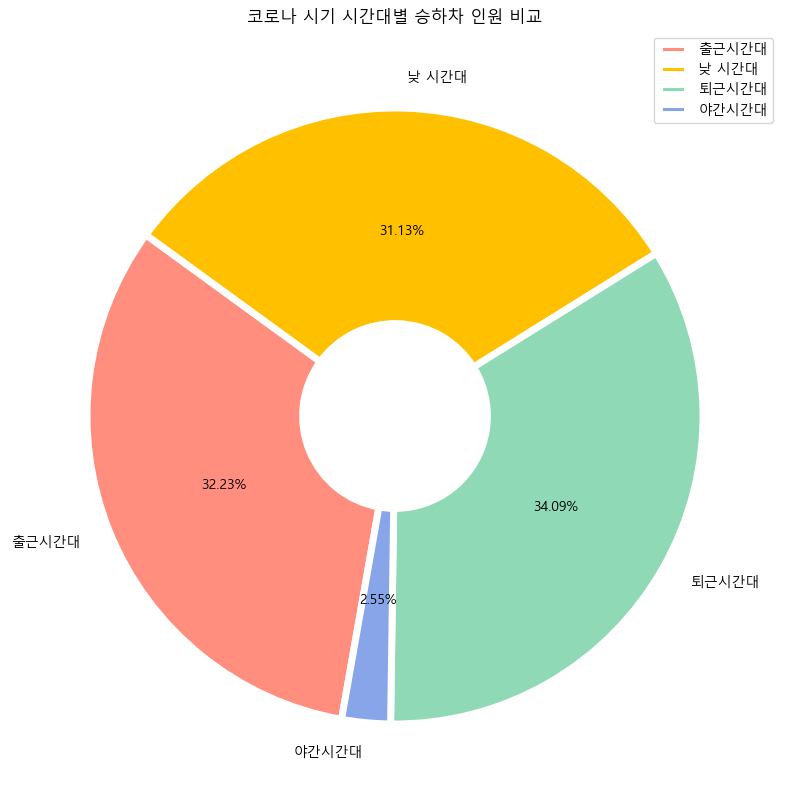

In [144]:
# 코로나 시기 시간대별 승하차 인원 전체 총합 파이차트

plt.rcParams["font.family"] = 'Malgun Gothic' #한글폰트
plt.rcParams["figure.figsize"] = (10,10) #그래픽 크기 설정

ratio = [32.23, 31.13, 34.09, 2.55]
labels = ['출근시간대','낮 시간대','퇴근시간대','야간시간대']
colors = ['#ff8e7f','#ffc000', '#8fd9b6', '#89a5ea']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, startangle=260,counterclock=False, colors=colors, wedgeprops=wedgeprops, autopct='%1.2f%%')
plt.legend(labels)

plt.title('코로나 시기 시간대별 승하차 인원 비교')

# 이미지 파일로 저장
plt.savefig('코로나 시기 파이차트.png')

[ 코로나 이후 ]

In [153]:
# '07시-08시', '08시-09시', '09-10시 합쳐서 '출근시간대' 컬럼 생성
df3['출근시간대'] = df3['07시-08시'] + df3['08시-09시'] + df3['09시-10시']
df3.head()

,날짜,역명,구분,06시 이전,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,...,일,요일,분기,역전화번호,도로명주소,지번주소,행정동,위도,경도,출근시간대
0,2022-04-01,1호선 서울역,승차,315,369,1334,2085,1509,1361,1696,...,1,금,2,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선),남대문로5가,37.553150,126.972533,4928
1,2022-04-01,1호선 서울역,하차,200,1276,3370,7239,4347,2056,1790,...,1,금,2,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선),남대문로5가,37.553150,126.972533,14956
2,2022-04-01,1호선 시청역,승차,78,115,238,292,292,391,493,...,1,금,2,02-6110-1321,서울특별시 중구 세종대로 지하101(정동),서울특별시 중구 정동 5-5 시청역(1호선),정동,37.563590,126.975407,822
3,2022-04-01,1호선 시청역,하차,192,658,2391,7239,2957,1059,951,...,1,금,2,02-6110-1321,서울특별시 중구 세종대로 지하101(정동),서울특별시 중구 정동 5-5 시청역(1호선),정동,37.563590,126.975407,12587
4,2022-04-01,1호선 종각역,승차,80,110,210,329,390,587,891,...,1,금,2,02-6110-1311,서울특별시 종로구 종로 지하55(종로1가),서울특별시 종로구 종로1가 54 종각역(1호선),종로1가,37.570203,126.983116,929


In [154]:
# '11시-12시', '12시-13시', '13시-14시', '14시-15시', '15시-16시' 합쳐서 '낮 시간대' 컬럼 생성
df3['낮 시간대'] = df3['11시-12시'] + df3['12시-13시'] + df3['13시-14시'] + df3['14시-15시'] + df3['15시-16시']
df3.head()

,날짜,역명,구분,06시 이전,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,...,요일,분기,역전화번호,도로명주소,지번주소,행정동,위도,경도,출근시간대,낮 시간대
0,2022-04-01,1호선 서울역,승차,315,369,1334,2085,1509,1361,1696,...,금,2,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선),남대문로5가,37.553150,126.972533,4928,10088
1,2022-04-01,1호선 서울역,하차,200,1276,3370,7239,4347,2056,1790,...,금,2,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선),남대문로5가,37.553150,126.972533,14956,9676
2,2022-04-01,1호선 시청역,승차,78,115,238,292,292,391,493,...,금,2,02-6110-1321,서울특별시 중구 세종대로 지하101(정동),서울특별시 중구 정동 5-5 시청역(1호선),정동,37.563590,126.975407,822,4110
3,2022-04-01,1호선 시청역,하차,192,658,2391,7239,2957,1059,951,...,금,2,02-6110-1321,서울특별시 중구 세종대로 지하101(정동),서울특별시 중구 정동 5-5 시청역(1호선),정동,37.563590,126.975407,12587,3872
4,2022-04-01,1호선 종각역,승차,80,110,210,329,390,587,891,...,금,2,02-6110-1311,서울특별시 종로구 종로 지하55(종로1가),서울특별시 종로구 종로1가 54 종각역(1호선),종로1가,37.570203,126.983116,929,6697


In [155]:
# '17시-18시', '18시-19시', '19시-20시' 합쳐서 '퇴근시간대' 컬럼 생성
df3['퇴근시간대'] = df3['17시-18시'] + df3['18시-19시'] + df3['19시-20시']
df3.head()

,날짜,역명,구분,06시 이전,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,...,분기,역전화번호,도로명주소,지번주소,행정동,위도,경도,출근시간대,낮 시간대,퇴근시간대
0,2022-04-01,1호선 서울역,승차,315,369,1334,2085,1509,1361,1696,...,2,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선),남대문로5가,37.553150,126.972533,4928,10088,15899
1,2022-04-01,1호선 서울역,하차,200,1276,3370,7239,4347,2056,1790,...,2,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선),남대문로5가,37.553150,126.972533,14956,9676,9390
2,2022-04-01,1호선 시청역,승차,78,115,238,292,292,391,493,...,2,02-6110-1321,서울특별시 중구 세종대로 지하101(정동),서울특별시 중구 정동 5-5 시청역(1호선),정동,37.563590,126.975407,822,4110,10240
3,2022-04-01,1호선 시청역,하차,192,658,2391,7239,2957,1059,951,...,2,02-6110-1321,서울특별시 중구 세종대로 지하101(정동),서울특별시 중구 정동 5-5 시청역(1호선),정동,37.563590,126.975407,12587,3872,1758
4,2022-04-01,1호선 종각역,승차,80,110,210,329,390,587,891,...,2,02-6110-1311,서울특별시 종로구 종로 지하55(종로1가),서울특별시 종로구 종로1가 54 종각역(1호선),종로1가,37.570203,126.983116,929,6697,13618


In [156]:
# '22시-23시', '23시-24시', '24시 이후' 합쳐서 '야간시간대' 컬럼 생성
df3['야간시간대'] = df3['22시-23시'] + df3['23시-24시'] + df3['24시 이후']
df3.head()

,날짜,역명,구분,06시 이전,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,...,역전화번호,도로명주소,지번주소,행정동,위도,경도,출근시간대,낮 시간대,퇴근시간대,야간시간대
0,2022-04-01,1호선 서울역,승차,315,369,1334,2085,1509,1361,1696,...,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선),남대문로5가,37.553150,126.972533,4928,10088,15899,NaN
1,2022-04-01,1호선 서울역,하차,200,1276,3370,7239,4347,2056,1790,...,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선),남대문로5가,37.553150,126.972533,14956,9676,9390,NaN
2,2022-04-01,1호선 시청역,승차,78,115,238,292,292,391,493,...,02-6110-1321,서울특별시 중구 세종대로 지하101(정동),서울특별시 중구 정동 5-5 시청역(1호선),정동,37.563590,126.975407,822,4110,10240,NaN
3,2022-04-01,1호선 시청역,하차,192,658,2391,7239,2957,1059,951,...,02-6110-1321,서울특별시 중구 세종대로 지하101(정동),서울특별시 중구 정동 5-5 시청역(1호선),정동,37.563590,126.975407,12587,3872,1758,NaN
4,2022-04-01,1호선 종각역,승차,80,110,210,329,390,587,891,...,02-6110-1311,서울특별시 종로구 종로 지하55(종로1가),서울특별시 종로구 종로1가 54 종각역(1호선),종로1가,37.570203,126.983116,929,6697,13618,NaN


In [157]:
# index를 포함하지 않고 데이터 저장
df3.to_csv("코로나 이후 시간대별 승하차인원.csv", index=False)
df3.head()

,날짜,역명,구분,06시 이전,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,...,역전화번호,도로명주소,지번주소,행정동,위도,경도,출근시간대,낮 시간대,퇴근시간대,야간시간대
0,2022-04-01,1호선 서울역,승차,315,369,1334,2085,1509,1361,1696,...,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선),남대문로5가,37.553150,126.972533,4928,10088,15899,NaN
1,2022-04-01,1호선 서울역,하차,200,1276,3370,7239,4347,2056,1790,...,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선),남대문로5가,37.553150,126.972533,14956,9676,9390,NaN
2,2022-04-01,1호선 시청역,승차,78,115,238,292,292,391,493,...,02-6110-1321,서울특별시 중구 세종대로 지하101(정동),서울특별시 중구 정동 5-5 시청역(1호선),정동,37.563590,126.975407,822,4110,10240,NaN
3,2022-04-01,1호선 시청역,하차,192,658,2391,7239,2957,1059,951,...,02-6110-1321,서울특별시 중구 세종대로 지하101(정동),서울특별시 중구 정동 5-5 시청역(1호선),정동,37.563590,126.975407,12587,3872,1758,NaN
4,2022-04-01,1호선 종각역,승차,80,110,210,329,390,587,891,...,02-6110-1311,서울특별시 종로구 종로 지하55(종로1가),서울특별시 종로구 종로1가 54 종각역(1호선),종로1가,37.570203,126.983116,929,6697,13618,NaN


In [158]:
df3_1 = pd.read_csv("./코로나 이후 시간대별 승하차인원.csv")
df3_1.head()

,날짜,역명,구분,06시 이전,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,...,역전화번호,도로명주소,지번주소,행정동,위도,경도,출근시간대,낮 시간대,퇴근시간대,야간시간대
0,2022-04-01,1호선 서울역,승차,315,369,1334,2085,1509,1361,1696,...,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선),남대문로5가,37.553150,126.972533,4928,10088,15899,NaN
1,2022-04-01,1호선 서울역,하차,200,1276,3370,7239,4347,2056,1790,...,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선),남대문로5가,37.553150,126.972533,14956,9676,9390,NaN
2,2022-04-01,1호선 시청역,승차,78,115,238,292,292,391,493,...,02-6110-1321,서울특별시 중구 세종대로 지하101(정동),서울특별시 중구 정동 5-5 시청역(1호선),정동,37.563590,126.975407,822,4110,10240,NaN
3,2022-04-01,1호선 시청역,하차,192,658,2391,7239,2957,1059,951,...,02-6110-1321,서울특별시 중구 세종대로 지하101(정동),서울특별시 중구 정동 5-5 시청역(1호선),정동,37.563590,126.975407,12587,3872,1758,NaN
4,2022-04-01,1호선 종각역,승차,80,110,210,329,390,587,891,...,02-6110-1311,서울특별시 종로구 종로 지하55(종로1가),서울특별시 종로구 종로1가 54 종각역(1호선),종로1가,37.570203,126.983116,929,6697,13618,NaN


In [159]:
# '출근시간대' 컬럼 전체 총합
df3_1_sum = df3_1['출근시간대'].sum()
print(df3_1_sum)

1115120167


In [160]:
# '낮 시간대' 컬럼 전체 총합
df3_2_sum = df3_1['낮 시간대'].sum()
print(df3_2_sum)

1306219643


In [161]:
# '퇴근시간대' 컬럼 전체 총합
df3_3_sum = df3_1['퇴근시간대'].sum()
print(df3_3_sum)

1292488088


In [162]:
# '야간시간대' 컬럼 전체 총합
df3_4_sum = df3_1['야간시간대'].sum()
print(df3_4_sum)

334210354.0


In [163]:
numbers = [1115120167, 1306219643, 1292488088, 334210354]
total = sum(numbers)
ratios = [num / total * 100 for num in numbers]
print(ratios)

[27.547174645621407, 32.2679668937081, 31.928751843227392, 8.2561066174431]


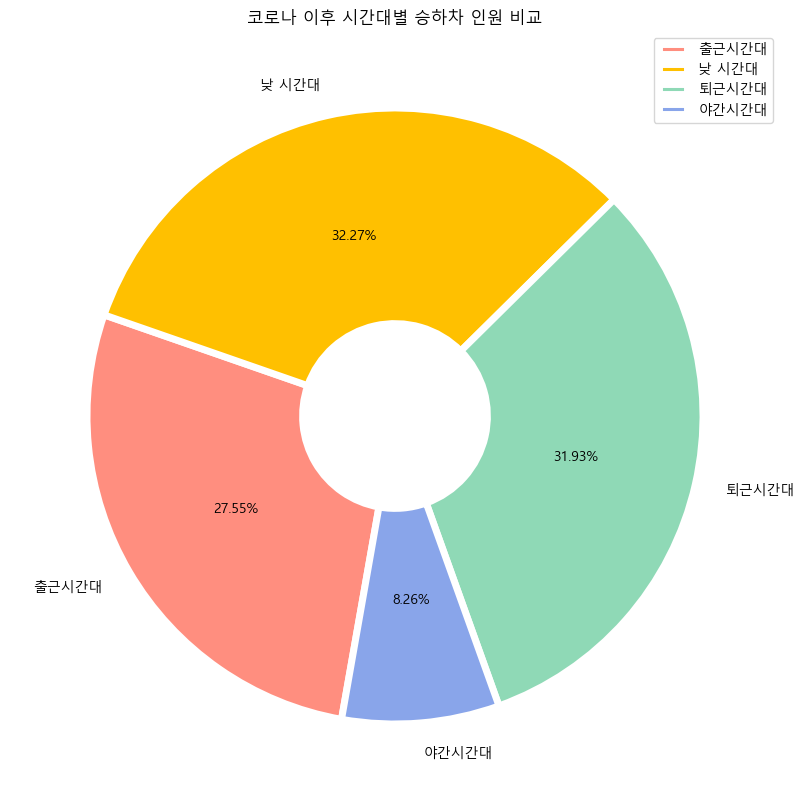

In [164]:
# 코로나 이후 시간대별 승하차 인원 전체 총합 파이차트

plt.rcParams["font.family"] = 'Malgun Gothic' #한글폰트
plt.rcParams["figure.figsize"] = (10,10) #그래픽 크기 설정

ratio = [27.55, 32.27, 31.93, 8.26]
labels = ['출근시간대','낮 시간대','퇴근시간대','야간시간대']
colors = ['#ff8e7f','#ffc000', '#8fd9b6', '#89a5ea']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, startangle=260,counterclock=False, colors=colors, wedgeprops=wedgeprops, autopct='%1.2f%%')
plt.legend(labels)

plt.title('코로나 이후 시간대별 승하차 인원 비교')

# 이미지 파일로 저장
plt.savefig('코로나 이후 파이차트.png')